<a href="https://colab.research.google.com/github/harshmudgil97/book_recommender_system/blob/main/captone_book_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation Engine**

#Introduction


---


During the last few decades, recommender systems have taken more and more place in our lives. From e-commerce to online advertisement, recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users. Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

#Data Description


---



**The Book-Crossing dataset comprises 3 files.**

**● Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**● Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**● Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [202]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [203]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [204]:
df_user = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Module 4: Machine Learning/Capstone Project - 2/BOOK RECOMMENDATION SYSTEM - Harsh Mudgil/Datasets/Users.csv')
df_books = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Module 4: Machine Learning/Capstone Project - 2/BOOK RECOMMENDATION SYSTEM - Harsh Mudgil/Datasets/Books.csv')
df_ratings = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Module 4: Machine Learning/Capstone Project - 2/BOOK RECOMMENDATION SYSTEM - Harsh Mudgil/Datasets/Ratings.csv')

#Primary Inspection


---



# On user data set

In [205]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [206]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [207]:
df_user.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


# On Books data set

In [208]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [209]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [210]:
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0446364371,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/034536208X.0...,http://images.amazon.com/images/P/037379116X.0...,http://images.amazon.com/images/P/038542471X.0...
freq,1,27,632,13903,7535,2,2,2


# **Insight:** It looks like some book titles have more than one ISBN

In [211]:
df_books.loc[df_books['ISBN'].str.endswith('X')].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
11,080652121X,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...
40,038078243X,Miss Zukas and the Raven's Dance,Jo Dereske,1996,Avon,http://images.amazon.com/images/P/038078243X.0...,http://images.amazon.com/images/P/038078243X.0...,http://images.amazon.com/images/P/038078243X.0...
41,055321215X,Pride and Prejudice,Jane Austen,1983,Bantam,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...,http://images.amazon.com/images/P/055321215X.0...
42,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...


In [212]:
#Titles with more than 1, ISBN code
df_books[df_books['Book-Title'] == "Where You'll Find Me: And Other Stories"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...
213486,0684815109,Where You'll Find Me: And Other Stories,Ann Beattie,1996,Scribner Book Company,http://images.amazon.com/images/P/0684815109.0...,http://images.amazon.com/images/P/0684815109.0...,http://images.amazon.com/images/P/0684815109.0...


# **Insight:** Some book titles, with different publishing dates, have different ISBN

In [213]:
#Removing Duplicates
#df_books.drop_duplicates('Book-Title', keep='first',inplace=True)

#On Ratings Data Set

In [214]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [215]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [216]:
df_ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [217]:
#Most frequently rated book
df_books[df_books['ISBN']=='0971880107']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...


In [218]:
df_books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [219]:
#Average rating of most frequently rated book
df_ratings[df_ratings['Book-Rating']!=0].groupby('ISBN')['Book-Rating'].mean()['0971880107']

4.3907056798623065

#**Insights:**
# 1. Most frequently rated book is: Wild Animus, by Rich Shapero
# 2. Average rating of the most frequently rated book is: 4.4/10

#Feature Engineering
Since we are merging data sets and creating new columns, missing values will be handeled latter

In [220]:
def get_country(x):
  return x.split(',')[-1]

In [221]:
df_location = df_user.copy(deep=True)
df_location['country'] = df_user['Location'].apply(get_country)

In [222]:
df_merged = df_ratings.merge(df_books,how='inner',on='ISBN')
df_merged = df_merged.merge(df_user,how='inner',on='User-ID')
df_merged['Location'] = df_merged['Location'].apply(get_country)

In [223]:
df_merged.shape

(1031136, 9)

In [224]:
df_merged['Title-Lenght'] = df_merged['Book-Title'].apply(len)

In [225]:
df_merged['Year-Of-Publication'] = pd.to_numeric(df_merged['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')

#Capping the outlier

In [226]:
df_merged['Age'] = np.where(df_merged['Age']>90, None, df_merged['Age'])

#Handeling Missing Values

In [227]:
#Dealing with empty strings
df_user.replace('', np.nan, inplace=True)
df_books.replace('', np.nan, inplace=True)
df_ratings.replace('', np.nan, inplace=True)
df_location.replace('', np.nan, inplace=True)
df_merged.replace('', np.nan, inplace=True)

In [228]:
# Missing Value Count Function
def show_missing(y):
    missing = y.columns[y.isnull().any()].tolist()
    return missing

def print_missing(x):
  # Missing data counts and percentage
  print('Missing Data Count')
  print(x[show_missing(x)].isnull().sum().sort_values(ascending = False))
  print('--'*50)
  print('Missing Data Percentage')
  print(round(x[show_missing(x)].isnull().sum().sort_values(ascending = False)/len(x)*100,2))

In [229]:
print_missing(df_user)

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [230]:
print_missing(df_books)

Missing Data Count
Publisher      2
Book-Author    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Publisher      0.0
Book-Author    0.0
dtype: float64


In [231]:
print_missing(df_ratings)

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [232]:
print_missing(df_location)

Missing Data Count
Age        110762
country      4578
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age        39.72
country     1.64
dtype: float64


In [233]:
print_missing(df_merged)

Missing Data Count
Age            281090
Location        24259
Publisher           2
Book-Author         1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age            27.26
Location        2.35
Publisher       0.00
Book-Author     0.00
dtype: float64


In [234]:
df_merged[['Book-Author', 'Publisher']] = df_merged[['Book-Author', 'Publisher']].fillna('Unknown')

In [235]:
median = df_merged["Age"].median()
std = df_merged["Age"].std()
is_null = df_merged["Age"].isnull().sum()

In [236]:
import random
random.seed(25)
rand_age = np.random.randint(median - std, median + std, size = is_null)

In [237]:
age_slice = df_merged["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
df_merged["Age"] = age_slice
df_merged["Age"] = df_merged["Age"].astype(int)

In [238]:
print_missing(df_merged) #Important missing Data has been delt with

Missing Data Count
Location    24259
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Location    2.35
dtype: float64


#Preparing the Dataset: Dealing with coldstart problem

In [239]:
df_merged['User-ID'].nunique()

92106

In [240]:
#Removing 0 ratings
df_merged_updated = df_merged[df_merged['Book-Rating']!=0]

In [241]:
#  df_merged_updated = df_merged[df_merged.groupby('Book-Title')['Book-Title'].transform(len) > 19]

In [242]:
#Selecting Books which have been rated more than 8 times
v = df_merged_updated['ISBN'].value_counts()
df_merged_updated = df_merged_updated[df_merged_updated['ISBN'].isin(v.index[v.gt(3)])]

In [243]:
#Selecting users which rated more than 4 Users
u = df_merged_updated['User-ID'].value_counts()
df_merged_updated = df_merged_updated[df_merged_updated['User-ID'].isin(u.index[u.gt(4)])]

#For the given Dataset, we will make recommendations for rank 0 (implicit) users latter on.

On the given data set, using a collaborative filltering aproach, we are able to produce quality recommendations for a subset of the users, who have rated the content.

Recommendations should be relevant, otherwise they can cause nuisance to the user.

#Exploratory Data Analysis


---



In [244]:
print('Number of books: ', df_merged['ISBN'].nunique())

Number of books:  270151


In [245]:
print('Number of users: ',df_merged['User-ID'].nunique())

Number of users:  92106


In [246]:
print('Number of outliers: ', sum(df_merged['Age'] > 100))

Number of outliers:  0


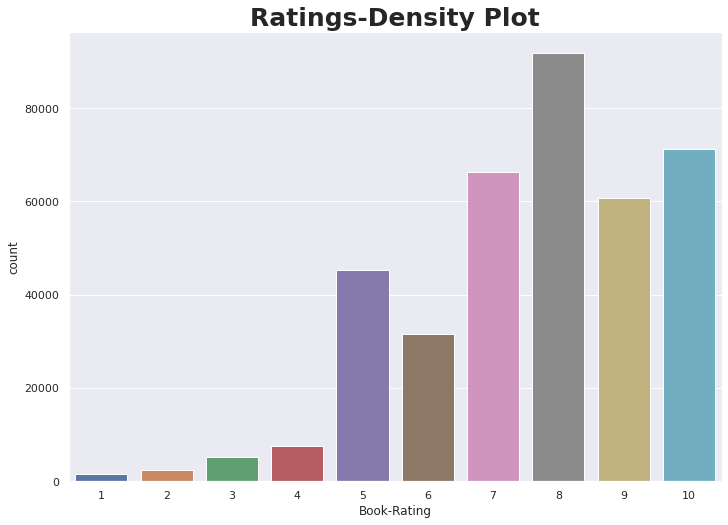

In [247]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_merged_0 = df_merged[df_merged['Book-Rating']!=0]
sns.countplot(x='Book-Rating', data=df_merged_0).set_title('Ratings-Density Plot', weight='bold').set_fontsize('25')

In [248]:
print('Average book rating: ', round(df_merged['Book-Rating'].mean(), 2))

Average book rating:  2.84


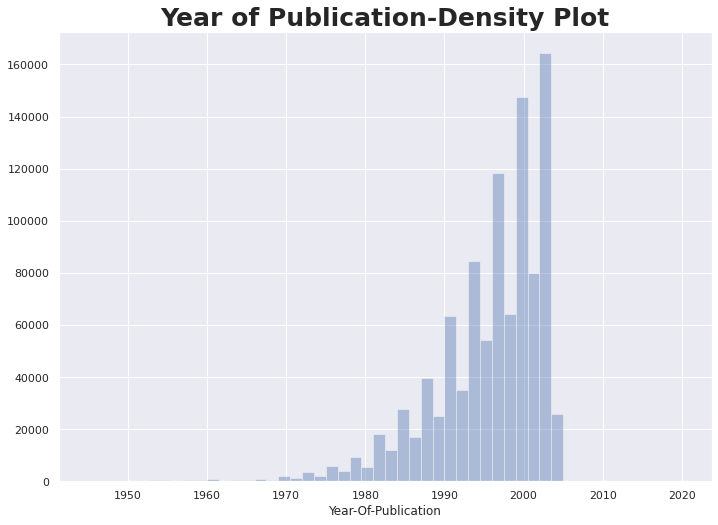

In [249]:
year = pd.to_numeric(df_merged['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')
sns.distplot(year, kde=False, hist_kws={"range": [1945,2020]},).set_title('Year of Publication-Density Plot', weight='bold').set_fontsize('25')

#Customer Geography Analysis

In [250]:
#Extracting customer country
df_location.head()

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [251]:
#Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(df_location.country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

#Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

#Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

In [252]:
#Every country has now just one occurance
df_location.countries.value_counts()

 germany           1
 australia         1
 spain             1
other              1
 netherlands       1
 new zealand       1
 italy             1
 france            1
 portugal          1
 usa               1
 canada            1
 united kingdom    1
Name: countries, dtype: int64

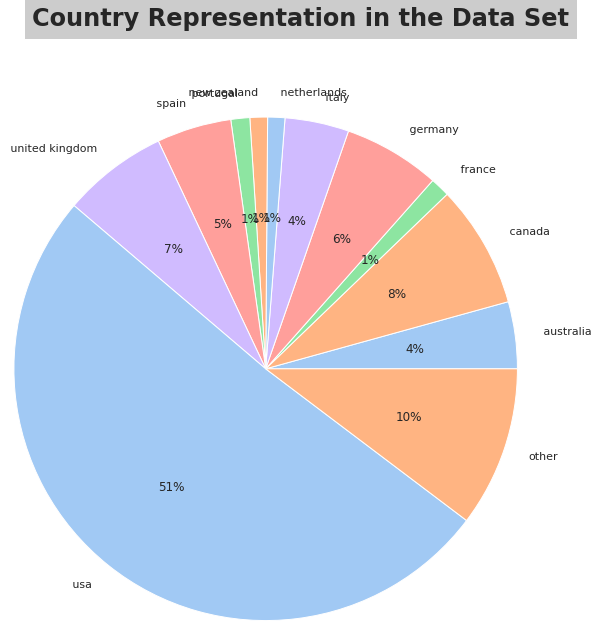

In [253]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)

# **Insight**: Most customers are from United states of America, followd by Canada, United Kingdom and Germany

*Countries with less than 1% customers are labeled as other

#Customer Age Analysis

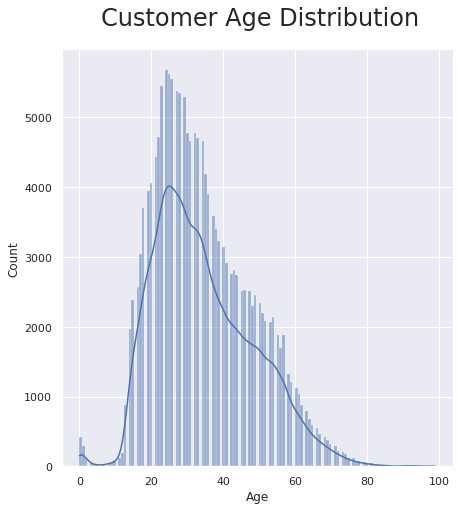

In [254]:
g=sns.displot(df_user['Age'][df_user['Age']<100].dropna(), kde='true',legend = False)
g.fig.suptitle("Customer Age Distribution", fontsize=24, fontdict={"weight": "bold"},y=1.05,x=0.58)
g.fig.set_size_inches(7,7)


# **Insights**
# 1. Most customers are in the age group of 24 to 44 years.
# 2. Average customer age is 34 years.

#Top selling books with country of sale.

In [255]:
df_merged.shape

(1031136, 10)

In [256]:
df_merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Title-Lenght
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,43,20
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,23,20
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,usa,23,45
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,usa,23,37
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,usa,23,48


In [257]:
#Top selling books with country of sale.
rank = df_merged.groupby(['Location','Book-Title'])['Book-Title'].agg(['count']).sort_values(by='count',ascending=False).reset_index()\
                                                          .drop_duplicates('Location', keep='first')\
                                                          .drop_duplicates('Book-Title', keep='first')

rank.head(10)

,Location,Book-Title,count
0,usa,Wild Animus,1201
2121,italy,"Novocento, Un Monologo",44
8620,switzerland,"Eine Frau, Eine Wohnung, Ein Roman",15
23750,argentina,Artificios,6
29197,n/a,Bridget Jones's Diary,5
33709,romania,Harry Potter and the Chamber of Secrets (Book 2),5
37426,sweden,Vatten melonen,4
38977,denmark,A Son of the Circus,4
41610,egypt,On Writing,4
42529,norway,The No. 1 Ladies' Detective Agency (Today Show...,4


#Top selling book, with median age of buyer

In [258]:
rank_age = df_merged.groupby(['Book-Title'])['Age'].agg(['median'])
rank_age.rename({'median':'median-age'},axis=1,inplace=True)    
merged_rank = pd.merge(rank,rank_age['median-age'],how='inner',on='Book-Title')                                              

In [259]:
merged_rank.head(10)

,Location,Book-Title,count,median-age
0,usa,Wild Animus,1201,32.0
1,italy,"Novocento, Un Monologo",44,31.0
2,switzerland,"Eine Frau, Eine Wohnung, Ein Roman",15,40.0
3,argentina,Artificios,6,32.0
4,n/a,Bridget Jones's Diary,5,32.0
5,romania,Harry Potter and the Chamber of Secrets (Book 2),5,32.0
6,sweden,Vatten melonen,4,31.0
7,denmark,A Son of the Circus,4,34.0
8,egypt,On Writing,4,35.0
9,norway,The No. 1 Ladies' Detective Agency (Today Show...,4,38.0


#Top Ranked books, with country and median age

In [260]:
#Top selling books with country of sale.
rank_rank = df_merged.groupby(['Location','Book-Title'])['Book-Rating'].agg(['mean']).sort_values(by='mean',ascending=False).reset_index()\
                                                          .drop_duplicates('Location', keep='first')\
                                                          .drop_duplicates('Book-Title', keep='first')
merged_rank_rank = pd.merge(rank_rank,rank_age['median-age'],how='inner',on='Book-Title')  
merged_rank_rank.rename({'mean':'mean-rating'},axis=1,inplace=True)  

In [261]:
merged_rank_rank.head(10)

,Location,Book-Title,mean-rating,median-age
0,usa,An Alphabet of Angels,10.0,40.0
1,spain,The Patio Garden Month-By-Month (Month-By-Mont...,10.0,57.0
2,canada,The Bride and the Bachelors: Five Masters of t...,10.0,19.0
3,bulgaria,The Little Mermaid,10.0,31.0
4,burma,Six Wives: The Queens of Henry VIII,10.0,27.0
5,cameroon,The Good American: A Novel Based On True Events,10.0,29.5
6,c,Anne of Green Gables,10.0,31.5
7,switzerland,Briefwechsel.,10.0,25.0
8,sweden,Born in Shame,10.0,34.5
9,"spain""","Ocho, El",10.0,28.5


In [262]:
df= merged_rank_rank['median-age'].head(10).reset_index()
df['top-selling'] = merged_rank['median-age'].head(10)

In [263]:
df.drop('index',axis=1,inplace=True)
df.rename({'median-age':'top-ranking'},axis=1,inplace=True)

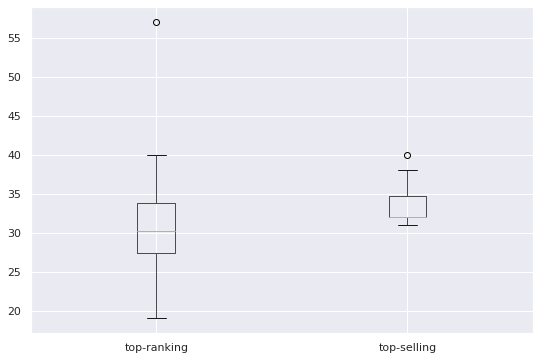

In [264]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot()
plt.show()

# **Insights**
# 1. Top rated books are different from top-selling books
# 2. People in the age group of 31 to 38 years of age are the once who are buying the top selling books.
# 3. People in the age group of 19 to 40 years of age are the once who are buying and rating the top-rated books

#From the boxplot, it can be said that top rated books have a wider age-group than the top selling books

#Using Collaborative Filltering Model

---



In [265]:
import math

In [266]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = df_merged_updated.groupby(['User-ID','Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 149525


,User-ID,Book-Title,Book-Rating
0,99,Fast Women,3.169925
1,99,Female Intelligence,3.169925
2,99,McDonald's: Behind the Arches,3.321928
3,99,Pasquale's Nose: Idle Days in an Italian Town,3.000000
4,99,"Rich Dad, Poor Dad: What the Rich Teach Their ...",3.459432


In [267]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(interactions_full_df['Book-Title'].unique())

LabelEncoder()

In [268]:
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df, 
                                   test_size=0.20,
                                   stratify=interactions_full_df['User-ID'],
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 119620
# interactions on Test set: 29905


In [269]:
interactions_train_df['Book-Title'] = le.transform(interactions_train_df['Book-Title'])
interactions_test_df['Book-Title'] = le.transform(interactions_test_df['Book-Title'])

interactions_train_df.head()

,User-ID,Book-Title,Book-Rating
64608,114544,5936,3.000000
56514,101304,7397,3.459432
18309,30711,12412,3.000000
32968,58062,908,2.321928
106610,197206,12566,3.000000


In [270]:
le.inverse_transform([5936])

array(['Icy Sparks'], dtype=object)

In [271]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='Book-Title', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

Book-Title,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16393,16394,16395,16396,16397,16398,16399,16400,16401,16403,16404,16405,16406,16407,16408,16409,16410,16411,16412,16413,16414,16415,16416,16417,16418,16419,16420,16421,16422,16423,16424,16425,16426,16427,16428,16429,16430,16431,16432,16433
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [273]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[99, 114, 242, 243, 244, 254, 388, 446, 487, 503]

In [274]:
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

### After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [275]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [276]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 2.89662580e-04,  8.72263072e-05, -1.39335159e-04, ...,
         9.32024448e-04,  5.95989371e-04,  1.57262328e-04],
       [ 2.59891632e-04,  2.31482652e-04,  8.32016680e-03, ...,
         1.19574581e-03,  3.36604969e-03,  6.15499350e-05],
       [ 5.03816877e-04,  1.56966343e-03, -1.07426460e-03, ...,
         3.93068024e-03, -8.53421646e-04,  8.60077830e-04],
       ...,
       [-1.14248657e-04, -2.63216364e-04, -3.41431004e-04, ...,
        -1.04632688e-03,  7.59363087e-06, -2.87026195e-04],
       [ 3.94904705e-05,  2.90046755e-03, -1.43982621e-03, ...,
         6.08516830e-03,  1.03099757e-03, -2.31220288e-04],
       [-4.70166577e-05, -1.76102476e-04,  7.45186854e-05, ...,
        -1.67845007e-03,  5.39881068e-04, -1.39487616e-04]])

In [277]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,99,114,242,243,244,254,388,446,487,503,505,507,595,638,643,651,709,735,741,805,834,882,929,1025,1075,1083,1116,1129,1131,1155,1167,1211,1248,1261,1409,1412,1424,1435,1548,1585,...,277378,277427,277439,277478,277523,277527,277623,277629,277639,277710,277711,277744,277901,277922,277928,277937,277945,277959,277965,277984,278007,278026,278137,278188,278194,278202,278221,278314,278356,278390,278418,278522,278535,278552,278554,278582,278633,278694,278843,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000290,0.000260,0.000504,0.002462,0.001065,-0.001061,0.000136,0.000090,0.000576,-0.000071,0.000387,0.003026,0.000586,0.004055,0.000095,0.000181,-0.000939,-0.000481,0.000019,0.004339,-0.000049,0.002872,0.000420,0.001738,0.000337,-0.000026,-0.000028,0.000318,0.001562,-0.000022,-0.000038,0.000166,0.000665,0.000705,0.000182,0.000491,0.001494,-0.000280,0.001874,-0.000284,...,0.002164,0.003102,-0.001171,0.000237,-0.001603,0.000978,0.000571,0.000015,-0.000151,-0.001123,0.000277,0.000506,0.001842,-0.000027,0.000136,0.000901,0.001918,0.000405,0.000771,-0.000505,0.001046,-0.000528,0.001842,0.001558,0.001448,0.000525,0.000525,0.000487,-0.002770,-0.000230,0.001369,-0.000236,-0.001063,0.000250,0.002765,0.002369,0.000670,-0.000114,0.000039,-0.000047
1,0.000087,0.000231,0.001570,-0.000010,0.001731,0.015440,0.000674,-0.000087,-0.001112,0.001061,0.000511,0.002984,-0.000139,0.003784,0.000229,0.000375,0.000485,-0.000264,0.000026,0.004479,0.000322,0.003301,0.002650,0.000978,0.002038,0.000799,-0.000163,-0.002367,0.001056,0.000422,0.000027,0.000102,0.000512,0.001388,-0.000452,0.001815,0.002798,0.002963,0.001925,0.000632,...,0.001879,0.007630,-0.000428,0.000176,-0.002533,0.001493,0.001308,-0.000624,-0.002351,0.000937,0.000028,0.001002,0.001325,-0.001479,0.000154,0.000474,-0.001112,-0.000197,0.000998,-0.000418,0.001284,-0.000609,0.002995,-0.001476,0.000231,-0.001706,0.000537,0.000201,0.006887,0.001425,0.001454,0.000181,-0.001166,0.000234,0.002620,0.002824,0.001435,-0.000263,0.002900,-0.000176
2,-0.000139,0.008320,-0.001074,0.000340,0.005222,0.000454,0.000097,0.002381,-0.001705,-0.001014,-0.001621,0.000307,-0.001135,0.002515,-0.000174,-0.002069,-0.002671,0.005070,-0.000126,0.001687,0.000194,0.001269,-0.001591,0.000085,-0.000989,-0.001108,-0.000312,-0.004969,0.006638,0.000723,-0.000328,-0.000415,-0.000569,0.000832,-0.001247,0.007744,-0.000007,-0.002517,0.000829,0.000200,...,0.000317,0.004050,-0.000761,-0.000308,0.026947,0.000459,0.001001,-0.004065,-0.004344,0.011607,-0.000271,-0.000816,0.001463,-0.002599,-0.001247,-0.000576,0.002342,0.002934,-0.001221,0.002403,0.001670,0.004930,-0.001925,0.006300,-0.001635,0.002552,0.002942,-0.000392,-0.003109,0.001795,-0.004269,-0.000312,-0.000954,-0.000249,0.001912,0.027345,-0.004319,-0.000341,-0.001440,0.000075
3,0.000242,0.000760,0.001840,0.002448,0.002258,-0.002561,0.000301,0.000375,-0.000018,-0.000452,0.000596,0.002749,-0.000348,0.001564,0.000023,0.000768,-0.001468,-0.000868,0.000060,0.005346,-0.000226,0.003560,0.002393,0.001840,0.001653,-0.000027,0.000041,-0.000982,0.002045,-0.000201,0.000049,0.000238,0.001240,0.000940,-0.000116,0.001372,0.001639,0.000431,0.002104,0.000379,...,0.003433,0.007200,-0.001454,0.000661,-0.003542,0.001229,0.000743,0.000197,-0.000903,-0.000751,0.000714,0.000603,0.001712,-0.000539,0.000084,0.001013,-0.000422,0.000011,0.000746,-0.000646,0.000785,-0.000773,0.003325,0.000314,0.001833,-0.000519,0.001237,0.000600,-0.006258,0.000053,0.002481,-0.000457,0.000413,0.000196,0.000944,0.003483,-0.001323,-0.000056,0.000184,0.000015
4,-0.000066,0.000059,0.000894,0.000818,0.001356,0.000858,0.000652,-0.000093,-0.000407,0.000513,0.001213,0.001308,0.000006,0.003347,0.000225,0.000031,0.000651,-0.000380,0.000019,0.003273,0.000188,0.001793,0.002142,0.001003,0.000976,0.000212,-0.000045,-0.000678,0.000935,0.000296,-0.000221,0.000075,0.000669,0.000631,-0.000320,0.001241,0.001959,0.004017,0.001500,0.000062,...,0.000517,0.001077,0.000292,0.000077,-0.001922,0.000871,0.

In [278]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book-Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Book-Title', 
                                                          right_on = 'Book-Title')[['recStrength','Book-Title']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, items_df=df_merged_updated)

In [279]:
cf_recommender_model

In [280]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [281]:
interactions_test_indexed_df.head()

,Book-Title,Book-Rating
User-ID,,
105335,130,3.169925
208236,881,3.169925
638,11915,3.459432
203900,5992,3.459432
189334,1944,3.459432


In [282]:
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['Book-Title']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [283]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_indexed_df)
        all_items = set(df_merged_updated['Book-Title'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['Book-Title']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['Book-Title'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['Book-Title'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id%2)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book-Title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Book-Title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator() 

In [284]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
8370 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.9900351111854205, 'recall@10': 0.9900351111854205}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
86,667,667,691,0.965268,0.965268,11676
82,236,236,241,0.979253,0.979253,98391
18,120,120,120,1.000000,1.000000,153662
314,100,100,101,0.990099,0.990099,16795
312,86,86,86,1.000000,1.000000,114368
226,82,82,83,0.987952,0.987952,95359
68,73,73,73,1.000000,1.000000,235105
324,66,66,66,1.000000,1.000000,104636
168,65,65,65,1.000000,1.000000,35859
1090,64,64,64,1.000000,1.000000,158295


# We have obtained 
#● **Recall@5: 99%**
#● **Recall@10: 99%**

In [285]:
recc = cf_recommender_model.recommend_items(40943)

In [286]:
recc = le.inverse_transform(recc['Book-Title'])

In [287]:
recc

array(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
       'The Secret Life of Bees',
       'Harry Potter and the Order of the Phoenix (Book 5)',
       "Harry Potter and the Sorcerer's Stone (Book 1)",
       "Bridget Jones's Diary",
       'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
       'The Nanny Diaries: A Novel'], dtype=object)

In [288]:
df_merged_updated[df_merged_updated['User-ID']==40943].head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Title-Lenght
367478,40943,0671003755,5,She's Come Undone (Oprah's Book Club (Paperback)),Wally Lamb,1996,Washington Square Press,usa,40,49
367497,40943,0679746048,8,"Girl, Interrupted",SUSANNA KAYSEN,1994,Vintage,usa,40,17
367499,40943,039480967X,5,Bears on Wheels (Bright &amp; Early Books),STAN BERENSTAIN,1969,Random House Books for Young Readers,usa,40,42
367514,40943,043936213X,10,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic,usa,40,46
367518,40943,0553274295,10,Where the Red Fern Grows,Wilson Rawls,1984,Random House Children's Books,usa,40,24


#We can see, the user: **40943**, has rated **Harry Potter and the Sorcerer's Stone (Book 1)**, very highly. Our model, is recommending other parts of the same series. This seems to be consistent with high precision and high recall values that we have obtained thus far.

#Content Based Filtering For 0 Rank User(Implicit)

---



#Extracting Summary from Google Books API

In [289]:
# Python's built-in module for encoding and decoding JSON data
import json
# Python's built-in module for opening and reading URLs
from urllib.request import urlopen

api = "https://www.googleapis.com/books/v1/volumes?q=isbn:"

In [290]:
gg = df_merged.drop_duplicates('Book-Title',keep='first')

In [291]:
list_isbn = list(gg['ISBN'][gg['Book-Rating']==0].unique())

In [292]:
list_dict= {}

#Google Books API has restrictions of number of requests. By using the following code, we have been able to circumvent those restrictions.

In [293]:
########## THE CODE WAS USED ONCE TO CREATE CSV FILE, WITH BOOK DESCRIPTIONS ##########


# def descripter(x):
#   global counter
#   counter +=1 
#   try:
#     return json.load(urlopen(api + x))['items'][0]['volumeInfo']["description"]
#   except:
#     print('No-Description')

# import time
# j = 52620
# while j!=len(list_isbn):

#   for i in list_isbn[j:j+80]:
#     list_dict[i] = descripter(i)
  
#   time.sleep(20)

#   j +=80  



###Exporting as CSV
# export_df = pd.DataFrame(list_dict.items(),columns=['ISBN','description'])
# export_df = export_df[~export_df['description'].isna()]

# from google.colab import files
# export_df.to_csv('description_df_1.csv')
# files.download('description_df_1.csv')


########## THE CODE WAS USED ONCE TO CREATE CSV FILE, WITH BOOK DESCRIPTIONS ##########

In [294]:
df_descriptions = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Module 4: Machine Learning/Capstone Project - 2/BOOK RECOMMENDATION SYSTEM - Harsh Mudgil/Datasets/description_df_1.csv')

In [295]:
df_descriptions.head()

,Unnamed: 0,ISBN,description
0,0,034545104X,Twenty years after having an affair with legen...
1,1,0449912558,The sole survivor of a crew sent to explore a ...
2,2,0300069049,Franz Liszt's daughter Cosima began her diarie...
3,3,0375706771,"In the winter of 1981, trapped by unpassable r..."
4,4,0451525078,Cervantes' tale of the deranged gentleman who ...


In [296]:
df_descriptions.drop('Unnamed: 0',axis=1,inplace=True)

In [297]:
df_tf = df_merged[df_merged['Book-Rating']==0]

In [298]:
df_tf = df_tf.merge(df_descriptions,how='inner',on='ISBN')

In [299]:
df_tf[df_tf['Book-Rating']==0].head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Title-Lenght,description
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,43,20,Twenty years after having an affair with legen...
1,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,34,20,Twenty years after having an affair with legen...
2,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,45,20,Twenty years after having an affair with legen...
3,28266,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,27,20,Twenty years after having an affair with legen...
4,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa,24,20,Twenty years after having an affair with legen...


#Data Pre-processing

In [300]:
import nltk
nltk.download('stopwords')
nltk.download('words')

import string
from nltk.corpus import stopwords
from nltk.corpus import words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [301]:
stopwords.words('english').extend(['\n','\t'])

In [302]:
#Removing Stop Words and Punctuations
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [303]:
#Removing Stopwords
df_descriptions['description'] = df_descriptions['description'].apply(text_process)

In [304]:
df_descriptions.head()

,ISBN,description
0,034545104X,Twenty years affair legendary artist George Ga...
1,0449912558,sole survivor crew sent explore new planet Jes...
2,0300069049,Franz Liszts daughter Cosima began diaries Jan...
3,0375706771,winter 1981 trapped unpassable roads midwife S...
4,0451525078,Cervantes tale deranged gentleman turns knight...


In [305]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

def lemma(text):    
    '''a function which stems each word in the given text'''
    text = [wnl.lemmatize(word) for word in text.split()]
    return " ".join(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [306]:
df_descriptions['description'] = df_descriptions['description'].apply(lemma)

#Vectorizing The Data

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5)
tfidf_mat = tfidf.fit_transform(df_descriptions['description'])

In [308]:
from sklearn.metrics.pairwise import cosine_similarity

In [309]:
# Change chunk_size to control resource consumption and speed
# Higher chunk_size means more memory/RAM needed but also faster 
chunk_size = 500 
matrix_len = tfidf_mat.shape[0] # Not sparse numpy.ndarray

def similarity_cosine_by_chunk(start, end):
    if end > matrix_len:
        end = matrix_len
    return cosine_similarity(X=tfidf_mat[start:end], Y=tfidf_mat) # scikit-learn function

for chunk_start in range(0, matrix_len, chunk_size):
    cosine_similarity_chunk = similarity_cosine_by_chunk(chunk_start, chunk_start+chunk_size)
    # Handle cosine_similarity_chunk  ( Write it to file_timestamp and close the file )
    # Do not open the same file again or you may end up with out of memory after few chunks 

In [310]:
indices = pd.Series(df_descriptions['ISBN'])

In [311]:
def recommendations(ISBN,cosine_sim = cosine_similarity_chunk ):
  try:
    index = indices[indices == ISBN].index[0]
    similarity_scores = pd.Series(cosine_similarity_chunk[index]).sort_values(ascending=False)
    top_10_books = list(similarity_scores.iloc[1:11].index)
    recommended_books_ISBN = [df_books[df_books['ISBN']==df_descriptions.iloc[list(df_descriptions.index)[i]]['ISBN']]['Book-Title'].to_list()[0] for i in top_10_books]
    return recommended_books_ISBN

  except:
    print('The Book Is not Indexed')


In [312]:
df_tf[df_tf['Book-Title']=='SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL'].head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Title-Lenght,description
5220,6543,0671659154,0,SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL,Pamela Greenwood,1989,Pocket,usa,34,45,"At the request of an acquaintance, Holmes and ..."
5221,278418,0671659154,0,SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL,Pamela Greenwood,1989,Pocket,usa,39,45,"At the request of an acquaintance, Holmes and ..."
5222,15418,0671659154,0,SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL,Pamela Greenwood,1989,Pocket,spain,23,45,"At the request of an acquaintance, Holmes and ..."
5223,221870,0671659154,0,SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL,Pamela Greenwood,1989,Pocket,usa,45,45,"At the request of an acquaintance, Holmes and ..."
5224,88733,0671659154,0,SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL,Pamela Greenwood,1989,Pocket,usa,43,45,"At the request of an acquaintance, Holmes and ..."


# For a person who has bought **SHERLOCK HOLMES &amp; THE CASE OF SABINA HALL** and has left no rating, based on the content of this book, we can recommend the following titles.

In [313]:
recommendations('0671659154') 

['The Case of Jennie Brice',
 "Alfred Hitchcock's Sinister Spies",
 'Man With A Past (Montana Mavericks #11) (Montana Mavericks No 11)',
 'The Witch Herself',
 'Rest in Pieces (Mrs. Murphy Mysteries (Paperback))',
 'Ellis Island &amp; Other Stories',
 'First Evil (Fear Street Cheerleaders 1) : First Evil',
 "Don't Go in the Basement (Sweet Valley Twins, 109)",
 'SLAG LIKE ME (ALIEN NATION 5) : SLAG LIKE ME (Alien Nation, No 5)',
 'Turnip Blues']

#We can notice that, all the books in above recommendation list, belong to the same genre, that is: Mystery. Thus our recommendation systems is working well.

